In [1]:
import openml
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") # no warnings on the console

In [2]:
datasets = sorted(pd.unique(pd.read_csv("../results/results_randomsearch.csv", usecols=["openmlid"])["openmlid"]))
rows = []
for openmlid in tqdm(datasets):
    
    # load dataset object
    dataset = openml.datasets.get_dataset(int(openmlid))
    
    # analyze columns of data
    cnt_normalized = 0
    cnt_zero_mean = 0
    cnt_one_std = 0
    cnt_numerical = 0
    row = [
        openmlid,
        dataset.name[:20].replace("_", "\\_"),
        int(dataset.qualities["NumberOfInstances"]),
        len(dataset.features) - 1,
        int(dataset.qualities["NumberOfNumericFeatures"]),
        int(dataset.qualities["NumberOfClasses"]),
        (str(int(dataset.qualities["MinorityClassPercentage"])) + "\%") if not np.isnan(dataset.qualities["MinorityClassPercentage"]) else np.nan,
        (str(int(dataset.qualities["MajorityClassPercentage"])) + "\%") if not np.isnan(dataset.qualities["MajorityClassPercentage"]) else np.nan
    ]
    rows.append(row)
dfDatasets = pd.DataFrame(rows, columns=["openmlid", "name", "instances", "features", "numeric features", "classes", "min \%", "maj \%"]).sort_values("openmlid")

  0%|          | 0/77 [00:00<?, ?it/s]

In [3]:
dfDatasets["matrix size (in thds.)"] = (dfDatasets["instances"] * dfDatasets["features"] / 1000).astype(int)
dfDatasets = dfDatasets[["openmlid", "name", "instances", "features", "numeric features", "matrix size (in thds.)", "classes", "min \%", "maj \%"]]
print(dfDatasets.to_latex(index=False, escape=False))

\begin{tabular}{rlrrrrrll}
\toprule
 openmlid &                    name &  instances &  features &  numeric features &  matrix size (in thds.) &  classes & min \% & maj \% \\
\midrule
        3 &                kr-vs-kp &       3196 &        36 &                 0 &                     115 &        2 &   47\% &   52\% \\
        6 &                  letter &      20000 &        16 &                16 &                     320 &       26 &    3\% &    4\% \\
       11 &           balance-scale &        625 &         4 &                 4 &                       2 &        3 &    7\% &   46\% \\
       12 &           mfeat-factors &       2000 &       216 &               216 &                     432 &       10 &   10\% &   10\% \\
       23 &                     cmc &       1473 &         9 &                 2 &                      13 &        3 &   22\% &   42\% \\
       30 &             page-blocks &       5473 &        10 &                10 &                      54 &        5 &  

In [4]:
dfDatasets

,openmlid,name,instances,features,numeric features,matrix size (in thds.),classes,min \%,maj \%
0,3,kr-vs-kp,3196,36,0,115,2,47\%,52\%
1,6,letter,20000,16,16,320,26,3\%,4\%
2,11,balance-scale,625,4,4,2,3,7\%,46\%
3,12,mfeat-factors,2000,216,216,432,10,10\%,10\%
4,23,cmc,1473,9,2,13,3,22\%,42\%
...,...,...,...,...,...,...,...,...,...
72,42732,sf-police-incidents,2215023,9,3,19935,2,12\%,87\%
73,42733,Click\_prediction\_sma,39948,11,5,439,2,16\%,83\%
74,42734,okcupid-stem,50789,19,2,964,3,9\%,71\%
75,42809,kits,1000,27648,27648,27648,2,48\%,52\%


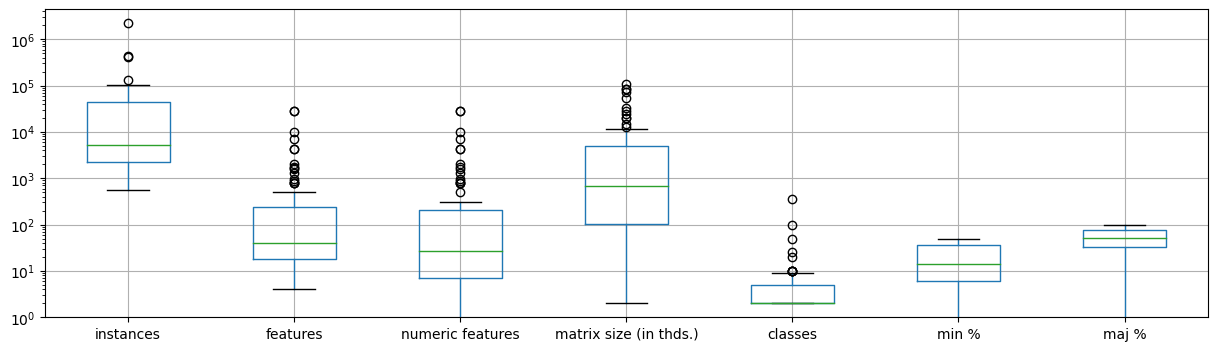

In [5]:
fig, ax = plt.subplots(figsize=(15, 4))
dfDatasets_reformatted = dfDatasets.dropna().copy()
dfDatasets_reformatted["min %"] = [e[:-2] for e in dfDatasets_reformatted["min \%"] if type(e) == str]
dfDatasets_reformatted["maj %"] = [e[:-2] for e in dfDatasets_reformatted["maj \%"] if type(e) == str]
dfDatasets_reformatted = dfDatasets_reformatted.astype({
    "min %": float,
    "maj %": float
})
dfDatasets_reformatted.drop(columns=["openmlid", "min \%", "maj \%"]).dropna().boxplot(ax=ax)
ax.set_yscale("log")
fig.savefig("plots/dataset_metafeatures.pdf", bbox_inches="tight")
plt.show()